In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

[]

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recentData = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


2017-08-23


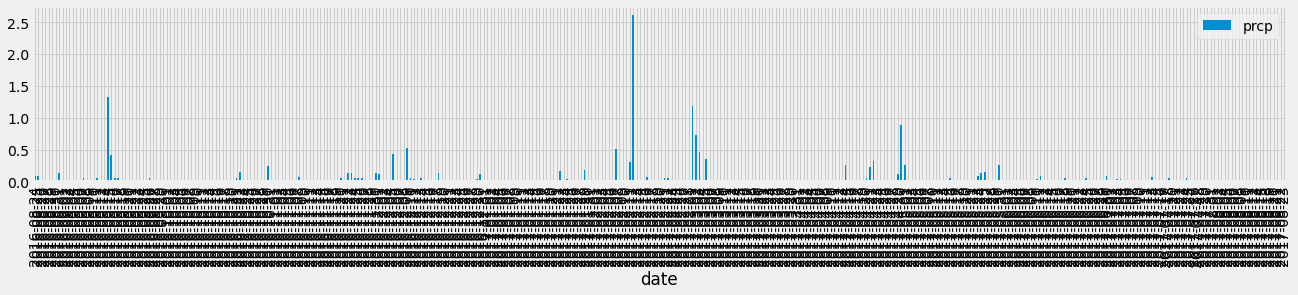

In [12]:
from datetime import timedelta, datetime
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
## 最近資料的站點
# recentStation = session.query(Measurement).order_by(Measurement.date.desc()).first().station
## 最近資料的日期
#recentDate = datetime.strptime(recentData.date, "%Y-%m-%d")
# Calculate the date one year from the last date in data set.  ## 最近資料的日期前一年
oneYearAgoDate = recentDate - timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneYearAgoDate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query).set_index('date')

# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,358.000000
mean,0.044944
std,0.189059
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
totalNumberStations = session.query(Measurement).group_by(Measurement.station).count()
print(totalNumberStations)
#session.query(func.count(Station.station)).all()  也可

9


In [1]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stationGroupQuery = session.query(Measurement.station, func.count(Measurement.id).label('count')).group_by(Measurement.station)

mostActiveStations = stationGroupQuery.order_by(func.count(Measurement.id).desc()).first()
print('most active stations:', mostActiveStations.station)
# List the stations and the counts in descending order.
for row in stationGroupQuery.order_by(func.count(Measurement.id).desc()).all():
    print(row.station, row.count)


#或許可以?
# join = session.query(Measurement, Station).filter(Measurement.station == Station.station).all()
#most_active = session.query(join).group_by(join.station).order_by(join.station.desc()).first()
#station_active_count = session.query(join).group_by(join.station).order_by(join.station.desc()).all()

    

NameError: name 'session' is not defined

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(Measurement).filter(Measurement.station == mostActiveStations.station).order_by(Measurement.tobs).first().tobs
print('lowest:', lowest)
highest = session.query(Measurement).filter(Measurement.station == mostActiveStations.station).order_by(Measurement.tobs.desc()).first().tobs
print('highest:', highest)
average = session.query(func.avg(Measurement.tobs).label('average')).filter(Measurement.station == mostActiveStations.station).first().average
print('average:', average)



#也可以
# sel[func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)]
# tem_data = session.query(*sel).filter(Measurement.station == "USC00519281").all()

lowest: 54.0
highest: 85.0
average: 71.66378066378067


In [ ]:
# Using the most active station id
## mostActiveStations.station
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
final =session.query(Measurement.tobs).filter(Measurement.date >= oneYearAgoDate).filter(Measurement.station == "USC00519281").all()

df = pd.DataFrame(final)
df.plot.hist(bins = 12)



# Close session

In [ ]:
# Close Session
session.close()